<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_sklearn/blob/main/RandomForest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [18]:
wine = load_wine()

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0) 
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

Single Tree:0.9074074074074074 Random Forest:0.9629629629629629


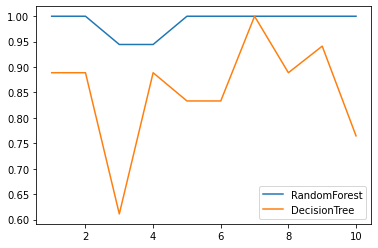

In [21]:
# 交叉验证

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11), rfc_s, label="RandomForest")
plt.plot(range(1,11), clf_s, label="DecisionTree")
plt.legend()
plt.show()


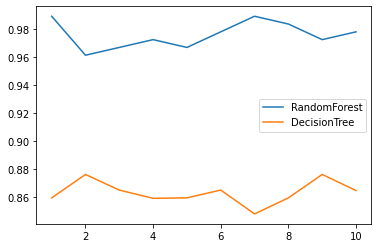

In [25]:
# 100次交叉验证
rfc_1 = []
clf_1 = []

for i in range(10):
  rfc = RandomForestClassifier(n_estimators=25)
  rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
  rfc_1.append(rfc_s)
  clf = DecisionTreeClassifier()
  clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
  clf_1.append(clf_s)


plt.plot(range(1,11),rfc_1,label="RandomForest")
plt.plot(range(1,11),clf_1,label="DecisionTree")
plt.legend()
plt.show()

0.9888888888888889 14


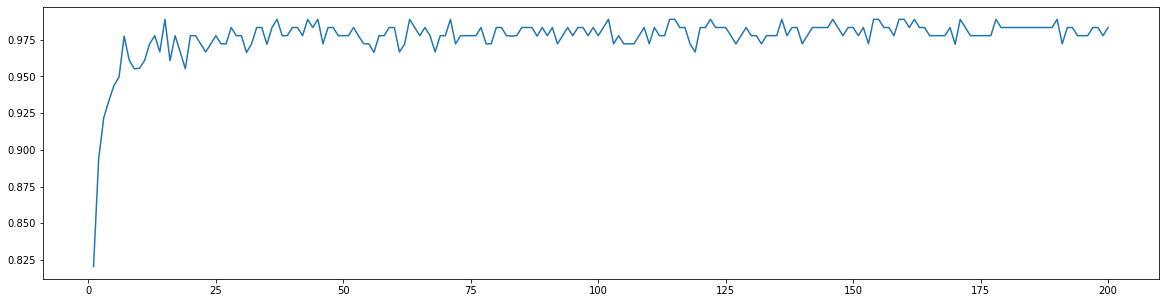

In [29]:
# n_estimators的学习曲线
# 会处于波动当中

superpa = []

for i in range(200):
  rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
  rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
  superpa.append(rfc_s)

print(max(superpa), superpa.index(max(superpa)))

plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [30]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*(0.8**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [34]:
# 在分类树中，一个random_state只控制生成一棵树，而随机森林中的random_state控制的是生成森林的模式，而非让一个森林中只有一棵树

rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)
rfc.estimators_  # estimators_:查看森林中各个树的状况（属性）

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [37]:
type(rfc.estimators_[0])  # estimators是sklearn中特有的类型，无法导入pandas进行切片处理，无法调出数值

sklearn.tree._classes.DecisionTreeClassifier

In [36]:
for i in range(len(rfc.estimators_)):
  print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是
用”随机挑选特征进行分枝“的方法得到的随机性。并且我们可以证明，当这种随机性越大的时候，袋装法的效果一
般会越来越好。用袋装法集成时，基分类器应当是相互独立的，是不相同的

但这种做法的局限性是很强的，当我们需要成千上万棵树的时候，数据不一定能够提供成千上万的特征来让我们构
筑尽量多尽量不同的树。因此，除了random_state。我们还需要其他的随机性

In [39]:
# 由于oob（袋外数据）请况存在，使用随机森林可以不划分测试集和训练集，只需要用袋外数据来测试我们的模型即可

rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target) # 完整的数据

In [40]:
rfc.oob_score_

0.9831460674157303

In [41]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)

In [42]:
rfc.score(Xtest,Ytest)

0.9814814814814815

In [43]:
rfc.feature_importances_

array([0.18575539, 0.02076245, 0.01393566, 0.02259157, 0.01464736,
       0.04300971, 0.10478595, 0.02498861, 0.00576718, 0.20491463,
       0.11642324, 0.1017998 , 0.14061845])

In [44]:
rfc.apply(Xtest) # 返回叶子节点的索引

array([[11,  7, 14, ..., 15, 13, 18],
       [ 3,  5,  4, ..., 11, 12,  2],
       [11,  6, 13, ..., 15, 13, 15],
       ...,
       [10, 14,  9, ..., 11,  1,  3],
       [ 8,  5,  7, ...,  7, 10, 13],
       [ 3, 10,  2, ..., 11,  1,  2]])

In [45]:
rfc.predict(Xtest)

array([0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 2])

In [46]:
rfc.predict_proba(Xtest) # 返回每类标签的概率

array([[0.88, 0.  , 0.12],
       [0.  , 0.24, 0.76],
       [1.  , 0.  , 0.  ],
       [0.64, 0.36, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.24, 0.72, 0.04],
       [0.92, 0.04, 0.04],
       [0.  , 0.8 , 0.2 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.24, 0.72],
       [1.  , 0.  , 0.  ],
       [0.04, 0.68, 0.28],
       [1.  , 0.  , 0.  ],
       [0.12, 0.8 , 0.08],
       [0.64, 0.32, 0.04],
       [0.  , 0.08, 0.92],
       [0.04, 0.88, 0.08],
       [0.96, 0.  , 0.04],
       [0.12, 0.84, 0.04],
       [0.  , 0.64, 0.36],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 1.  , 0.  ],
       [0.24, 0.64, 0.12],
       [0.88, 0.08, 0.04],
       [0.  , 0.16, 0.84],
       [0.  , 1.  , 0.  ],
       [0.08, 0.32, 0.6 ],
       [0.88, 0.08, 0.04],
       [0.08, 0.08, 0.84],
       [0.  , 0.96, 0.04],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
 

之前我们说过，在使用袋装法时要求基评估器要尽量独立。其实，袋装法还有另一个必要条件：基分类器的判断准
确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%。之前我们已经展示过随机森林的准
确率公式，基于这个公式，我们画出了基分类器的误差率ε和随机森林的误差率之间的图像。大家可以自己运行一
下这段代码，看看图像呈什么样的分布

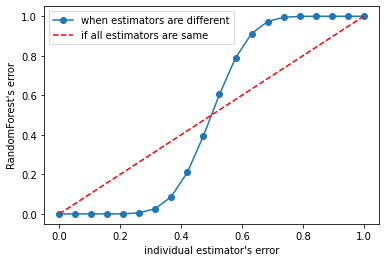

In [48]:
import numpy as np
x = np.linspace(0,1,20)
y = []

for epsilon in np.linspace(0,1,20):
  E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
  y.append(E)

plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反，
当基分类器的误差率大于0.5，袋装的集成算法就失效了。所以在使用随机森林之前，一定要检查，用来组成随机
森林的分类树们是否都有至少50%的预测正确率